In [2]:
from Alavian import dynamics_solve, population, hamiltonian_solve, d_qH1, d_pH1, pop2, pop3, popc,d_qearth, d_pearth
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import newton
import sys
plt.style.use("ggplot") # In Josh's opinion, this makes plots a bit prettier :) . Feel free to remove if desired.

# A. Code Tests
1. In this example I will use the same population example from lecture with the birds on the island.

  $P(t)$ = The population of birds at time -t

  $t_0$ = The initial time.

  $P_0$ = 5,271,000 birds

  $B$ = 17 bird births per 1000 birds per year

  $D$ = 32 bird deaths per 1000 birds per year

- We need to prove that as long as the step size is sufficently small, the numerical solution from our approximations can be made to agree with our exact solution as accurately as we want.

  The exact solution of the intitial value problem of the population can be expressed as:

  $P_e(t) = P_0e^{(B-D)t}$

  and from this we can derive the natural time scale $\tau$. This represent the time it will take the population to decrease by amount $\frac{P_0}{e}$

  $\tau = |\frac{1}{B-D}|= |\frac{(17-32/1000)}{1year}| =$ 800 months

-  So for this system "sufficently small" is when $\Delta t/\tau << 1$ or essentially $\Delta t <<$ 800 months. However, the smaller our step size (over the same time frame) the more accurate our results. I will run the approximation for exactly one year and see how acurate our results are. The exact solution should be  $5,192,525$  birds. 

- I will show below how decreasing the step size increases accuracy and how the different methods (Euler's, RK2, and RK4) correspond to different orders of error based on their "global truncation error".

Step size 1 month 5192476.313349451
Step size about 2 weeks 5192500.683597336
Step size about 1 week 5192512.861145459
Step size about 3.5 days 5192518.9480271125
Step size about 1.5 days 5192521.990995025


Text(0.5, 1.0, 'Population Evolution for various step sizes "Euler"')

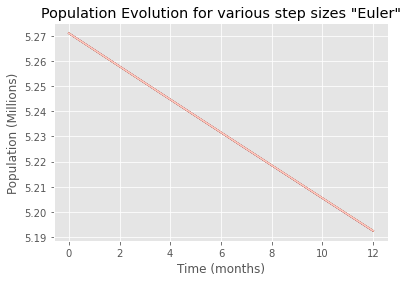

In [2]:
T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 1, N = 12, method = "Euler")
plt.plot(T,S, color = "red")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size 1 month", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.5, N = 24, method = "Euler")
plt.plot(T,S, color = "blue")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 2 weeks", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.25, N = 48, method = "Euler")
plt.plot(T,S, color = "purple")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 1 week", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.125, N = 96, method = "Euler")
plt.plot(T,S, color = "yellow")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 3.5 days", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.0625, N = 192, method = "Euler")
plt.plot(T,S, color = "pink")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 1.5 days", lastelem*1000000)

plt.xlabel('Time (months)')
plt.ylabel('Population (Millions)')
plt.title('Population Evolution for various step sizes "Euler"')



Step size 1 month 5192525.0539500695
Step size about 2 weeks 5192525.038720946
Step size about 1 week 5192525.034915749
Step size about 3.5 days 5192525.033964703
Step size about 1.5 days 5192525.033726986


Text(0.5, 1.0, 'Population Evolution for various step sizes "RK2"')

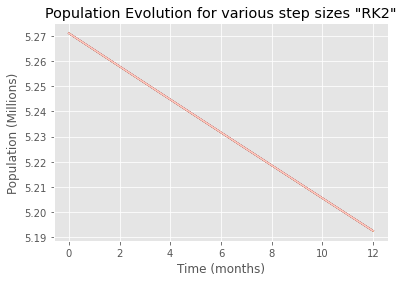

In [3]:
T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 1, N = 12, method = "RK2")
plt.plot(T,S, color = "red")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size 1 month", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.5, N = 24, method = "RK2")
plt.plot(T,S, color = "blue")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 2 weeks", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.25, N = 48, method = "RK2")
plt.plot(T,S, color = "purple")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 1 week", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.125, N = 96, method = "RK2")
plt.plot(T,S, color = "yellow")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 3.5 days", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.0625, N = 192, method = "RK2")
plt.plot(T,S, color = "pink")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 1.5 days", lastelem*1000000)

plt.xlabel('Time (months)')
plt.ylabel('Population (Millions)')
plt.title('Population Evolution for various step sizes "RK2"')

Step size 1 month 5192525.033647744
Step size about 2 weeks 5192525.033647743
Step size about 1 week 5192525.033647745
Step size about 3.5 days 5192525.033647743
Step size about 1.5 days 5192525.033647737


Text(0.5, 1.0, 'Population Evolution for various step sizes "RK4"')

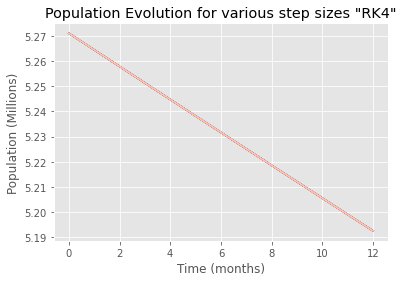

In [4]:
T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 1, N = 12, method = "RK4")
plt.plot(T,S, color = "red")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size 1 month", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.5, N = 24, method = "RK4")
plt.plot(T,S, color = "blue")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 2 weeks", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.25, N = 48, method = "RK4")
plt.plot(T,S, color = "purple")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 1 week", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.125, N = 96, method = "RK4")
plt.plot(T,S, color = "yellow")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 3.5 days", lastelem*1000000)


T, S = dynamics_solve(population, D = 1, t_0 = 0.0, s_0 = 5.271, h = 0.0625, N = 192, method = "RK4")
plt.plot(T,S, color = "pink")
slen = len(S)
lastelem = S[slen - 1] 
print("Step size about 1.5 days", lastelem*1000000)

plt.xlabel('Time (months)')
plt.ylabel('Population (Millions)')
plt.title('Population Evolution for various step sizes "RK4"')

It is easy to see why Euler's method is defined as a first order method while RK2 and RK4 are considered second and fourth order. Even on this relatively short time frame with small steps, Euler's method increases it's accuracy greatly when we drop the time frame from a month to about a day and a half. We go from 49 birds to within 4 birds of the exact value over one year. The RK2 and RK4 show greater accuracy despite these time steps.

Euler Slope -0.9080302388243994
RK2 Slope -2.661640663425561
RK4 Slope -3.3918090711607545


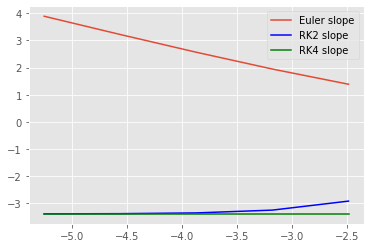

In [5]:
gte1 = 49
gte2 = 25
gte3 = 13
gte4 = 7
gte5 = 4

dt = [(1/12), (1/24), (1/48), (1/96), (1/192)]
gtes = [gte5, gte4, gte3, gte2, gte1]
m, b = np.polyfit(np.log(dt), np.log(gtes),1)
print("Euler Slope", b)
plt.plot(np.log(dt), np.log(gtes), label = "Euler slope")



gte1 = abs(5192525 - 5192525.0539500695)
gte2 = abs(5192525 - 5192525.038720946)
gte3 = abs(5192525 - 5192525.034915749)
gte4 = abs(5192525 - 5192525.033964703)
gte5 = abs(5192525 - 5192525.033726986)

gtes2 = [gte1, gte2, gte3, gte4, gte5]
m, b = np.polyfit(np.log(dt), np.log(gtes2),1)
print("RK2 Slope", b)
plt.plot(np.log(dt), np.log(gtes2), label = "RK2 slope", color = "blue")


gte1 = abs(5192525 - 5192525.033647744)
gte2 = abs(5192525 - 5192525.033647743)
gte3 = abs(5192525 - 5192525.033647745)
gte4 = abs(5192525 - 5192525.033647743)
gte5 = abs(5192525 - 5192525.033647737)
gtes = [gte1, gte2, gte3, gte4, gte5]
m, b = np.polyfit(np.log(dt), np.log(gtes),1)
print("RK4 Slope", b)
plt.plot(np.log(dt), np.log(gtes), label = "RK4 slope", color = "green")

plt.legend()



I think my time frame was a bit too small and thats why my slopes arent as accurate as they should be.

# 2) Code tests with Hamiltonian solve for the simple harmonic oscillator as a test case

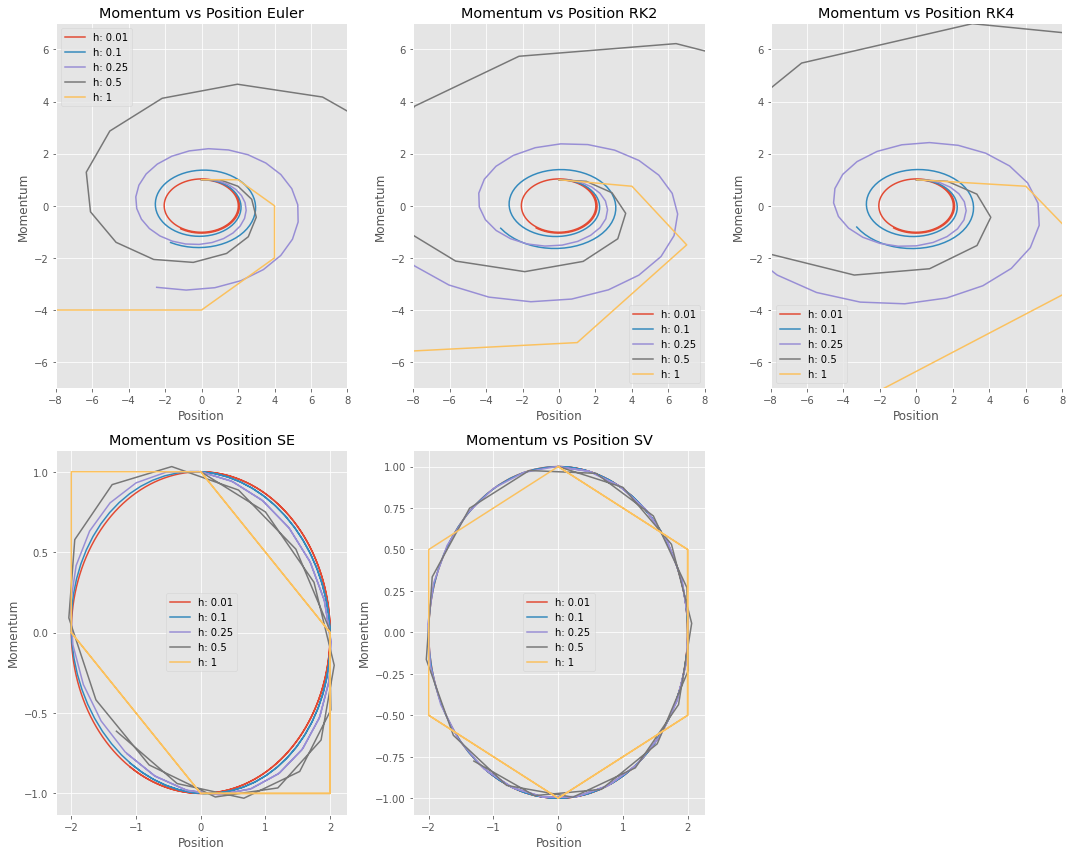

In [25]:
fig = plt.figure(figsize = (15, 12))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

dh=[0.01, 0.10, 0.25, 0.5, 1]
ns=[1000, 100, 40, 20, 10]

ax_1 = fig.add_subplot(2, 3, 1)
ax_2 = fig.add_subplot(2, 3, 2)
ax_3 = fig.add_subplot(2, 3, 3)
ax_4 = fig.add_subplot(2, 3, 4)
ax_5 = fig.add_subplot(2, 3, 5)

method_select = ["Euler", "RK2", "RK4","SE", "SV"]
axes_tot = [ax_1, ax_2, ax_3, ax_4, ax_5]

for method_choser, axis in zip(method_select, axes_tot):
    for h1, n1 in zip(dh, ns):
        T, X, P = hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = h1, N = n1, method = method_choser)
        labelmeth = f"h: {h1}"
        axis.plot(X, P, label = labelmeth)
    if method_choser == "Euler" or method_choser == "RK2" or method_choser == "RK4":
        axis.set_xlim([-8,8])
        axis.set_ylim([-7,7])
    axis.set_xlabel("Position")
    axis.set_ylabel("Momentum")
    axis.set_title(f"Momentum vs Position {method_choser}")
    axis.legend()
    plt.tight_layout()
plt.show()

- From lecture we know that a harmonic oscillator with a mass of 0.5 and angular velocity $\omega = 1$ should have a solution that resembles an
oval (depending on initial energy). We see as we decrese the step size our solutions become increasingly more accurate to the exact solution and lose their spiraling tail for the lower order approximations. On the same token if we keep the step size the same and increase the periods to very large amounts our approximations will begin to deviate from the true solution. I will explore this more in the plots below by fixing the step size and making the periods extremely large

<function matplotlib.pyplot.show(close=None, block=None)>

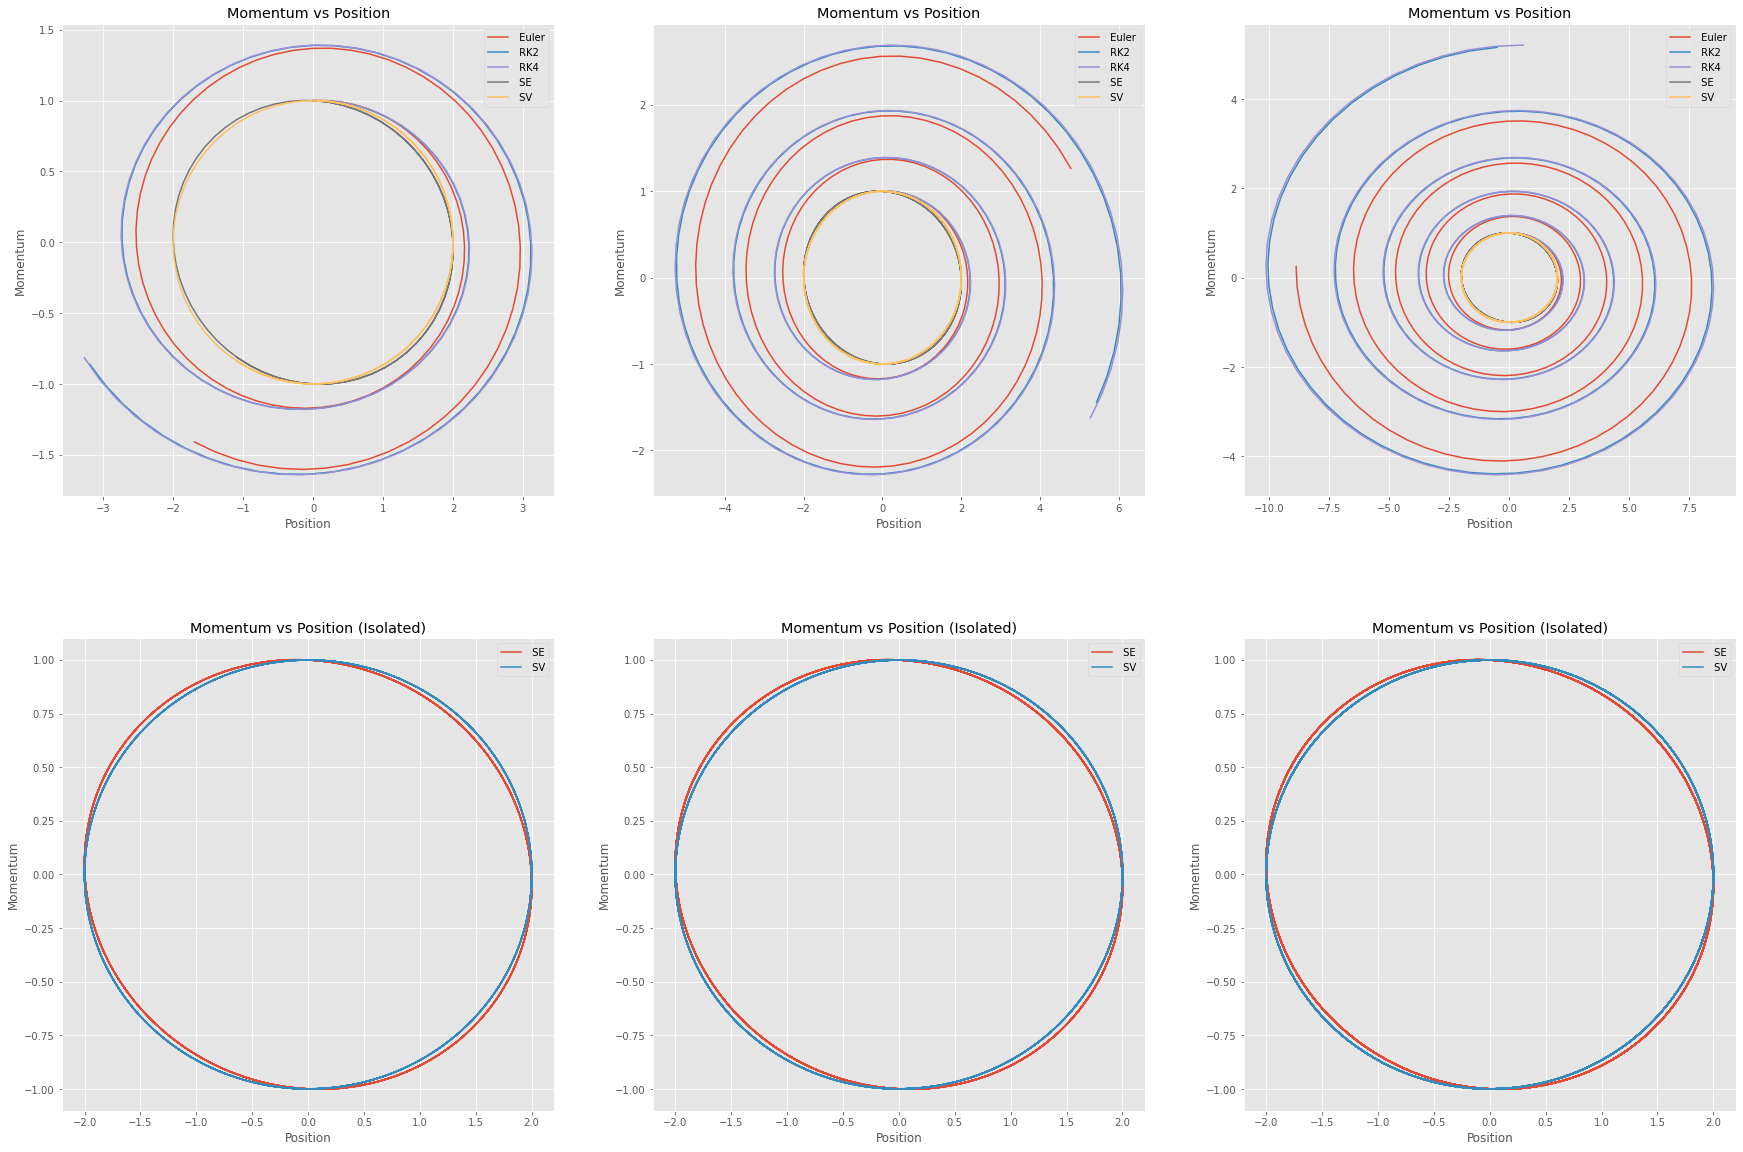

In [75]:
fig = plt.figure(figsize = (30, 20))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
ax_1 = fig.add_subplot(2, 3, 1)
ax_2 = fig.add_subplot(2, 3, 2)
ax_3 = fig.add_subplot(2, 3, 3)
ax_4 = fig.add_subplot(2, 3, 4)
ax_5 = fig.add_subplot(2, 3, 5)
ax_6 = fig.add_subplot(2, 3, 6)


for method_choser in method_select:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 100, method = method_choser)
    labelmeth = f" {method_choser}"
    ax_1.plot(positionh, momentumh, label = labelmeth)
    ax_1.legend()
    ax_1.set_xlabel("Position")
    ax_1.set_ylabel("Momentum")
    ax_1.set_title("Momentum vs Position")
    
for method_choser in method_select:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 200, method = method_choser)
    labelmeth = f" {method_choser}"
    ax_2.plot(positionh, momentumh, label = labelmeth)
    ax_2.legend()
    ax_2.set_xlabel("Position")
    ax_2.set_ylabel("Momentum")
    ax_2.set_title("Momentum vs Position")

for method_choser in method_select:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 300, method = method_choser)
    labelmeth = f" {method_choser}"
    ax_3.plot(positionh, momentumh, label = labelmeth)
    ax_3.legend()
    ax_3.set_xlabel("Position")
    ax_3.set_ylabel("Momentum")
    ax_3.set_title("Momentum vs Position")
    
rest = ["SE", "SV"]
for method_choser in rest:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 500, method = method_choser)
    labelmeth = f" {method_choser}"
    ax_4.plot(positionh, momentumh, label = labelmeth)
    ax_4.legend()
    ax_4.set_xlabel("Position")
    ax_4.set_ylabel("Momentum")
    ax_4.set_title("Momentum vs Position (Isolated)")
    
for method_choser in rest:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 1000, method = method_choser)
    labelmeth = f" {method_choser}"
    ax_5.plot(positionh, momentumh, label = labelmeth)
    ax_5.legend()
    ax_5.set_xlabel("Position")
    ax_5.set_ylabel("Momentum")
    ax_5.set_title("Momentum vs Position (Isolated)")
    
for method_choser in rest:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 2000, method = method_choser)
    labelmeth = f" {method_choser}"
    ax_6.plot(positionh, momentumh, label = labelmeth)
    ax_6.legend()
    ax_6.set_xlabel("Position")
    ax_6.set_ylabel("Momentum")
    ax_6.set_title("Momentum vs Position (Isolated)")


plt.plot
plt.show

As we can see if we keep our step size constant and increase our total oscillations the approximations begin to break down and deviate greatly from the real answer. The approximations that seem to break down the worst are Euler, RK2, and RK4, while the Symplectic Euler and Stormer Verlet seem to hold up well even with the increased step sizes. This is hard to see with the overlayed approximations, so I isolated them and repeated the same step sizes to show their accuracy. The SE and SV methods still stay tight and collected around the exact solutions while the Euler, RK2 and especially RK4 sprial off to greater distnaces

- I will now show how the energy of the system evolves over time for each of the approximations

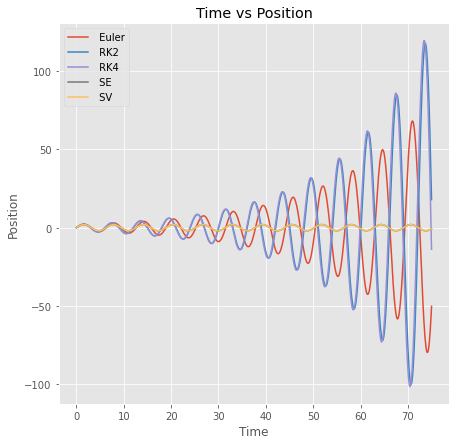

In [82]:
fig = plt.figure(figsize = (7, 7))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

for method_choser in method_select:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 750, method = method_choser)
    labelmeth = f" {method_choser}"
    plt.plot(timeh, positionh, label = labelmeth)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.title("Time vs Position")
plt.show()

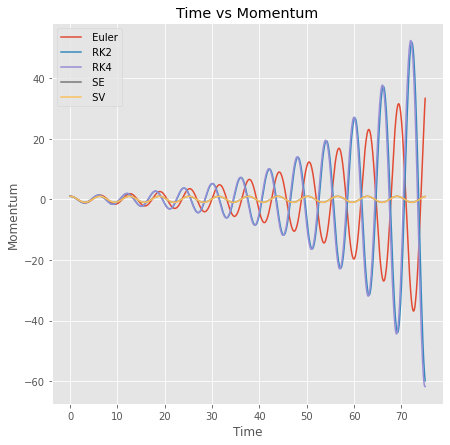

In [83]:
fig = plt.figure(figsize = (7, 7))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

for method_choser in method_select:
    timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 750, method = method_choser)
    labelmeth = f" {method_choser}"
    plt.plot(timeh, momentumh, label = labelmeth)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Momentum")
    plt.title("Time vs Momentum")
plt.show()

Here we can see how SV and SE method very closely overlap each other as they oscillate around the origin which in this case is closest to the true solution. On the other hand Euler, and the RK's begin to drift away and continuosly oscillate further away from the origin gaining momentum and position. This causes them to become more and more inaccurate in the case of the simple harmonic oscillator.

# B) Analysis of a more general population model

1) The presented function $f(t,P)$ has two roots, $ P = 0$ and $P=K$, if the function ever equals one of these roots, it will remain the same forever after. Etc, if $P=0$ it will remain zero.

2) Im not sure what the value of R is, but $P$ on the open interval $(0,K)$ would make $\frac{P}{K}$ less than one, and thus cause a negative growth rate for this population.

3) On the other hand when $P$ is on the open interval $(K, \infty)$ would be greater than one causing an exponentially growing population.

4)
- Without an initial population there will be no growth in this case and remain zero.

- If the inital population size $P_0$ is less then the carrying capacity $K$ then it will grow and taper off as it nears $K$

- If the intial population is equal to the carrying capacity $K$ it will not grow or decrease but stay at "maitenance"

- For an initial population over the carrying capacity $K$ the population will decrease and taper off as it nears, and finally settles around $K$

5) I guess I cheated and looked up K before arriving at this question but google taught me that it represents the carrying capacity/equilibrium for the population

6) Plot below to find the roots

7) Plot below to test for initial conditions given above

8) My prediction of the zeros of the function were correct, and so were my predictions about the intial population conditions.

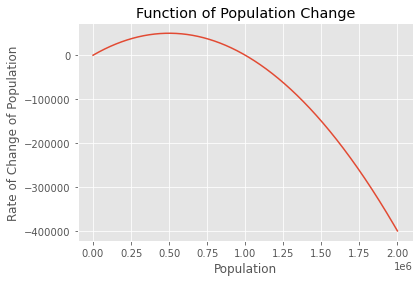

In [25]:
timerange = np.arange(0,2 * (10**6), 500)

plt.plot(timerange, pop2(timerange))
plt.xlabel("Population")
plt.ylabel("Rate of Change of Population")
plt.title("Function of Population Change")
plt.show()



Text(0.5, 0, 'Time (years?)')

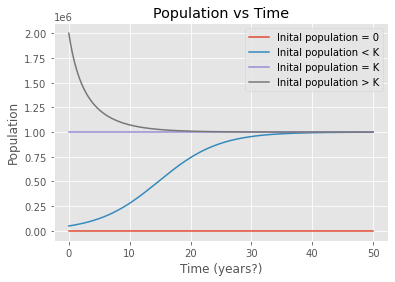

In [28]:
time, population = dynamics_solve(pop3, s_0 = 0, t_0 = 0, h = 0.1, N = 500, method = "RK4")
plt.plot(time, population, label = "Inital population = 0")

time, population = dynamics_solve(pop3, s_0 = (5 * 10**4), t_0 = 0, h = 0.1, N = 500, method = "RK4")
plt.plot(time, population, label = "Inital population < K")

time, population = dynamics_solve(pop3, s_0 = (1 * 10**6), t_0 = 0, h = 0.1, N = 500, method = "RK4")
plt.plot(time, population, label = "Inital population = K")

time, population = dynamics_solve(pop3, s_0 = (2 * 10**6), t_0 = 0, h = 0.1, N = 500, method = "RK4")
plt.plot(time, population, label = "Inital population > K")
plt.legend()

plt.title("Population vs Time")
plt.ylabel("Population")
plt.xlabel("Time (years?)")

# C) Analysis of more general pop model

Text(0, 0.5, 'Rate of Change')

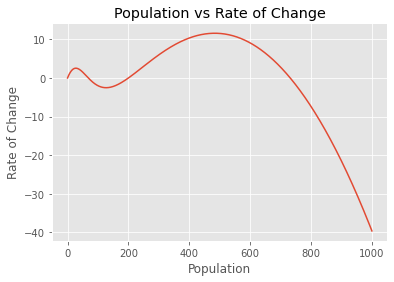

In [56]:
Pvals = np.arange(0, 1001, 1)
Tvals = np.arange(0, 1001, 1)

plt.plot(Pvals, popc(Tvals,Pvals))
plt.title("Population vs Rate of Change")
plt.xlabel("Population")
plt.ylabel("Rate of Change")

#The roots seem to be 0, 75, 200, and 725, totally guessing couldnt find the derivative to use newton

3) I was unsuccesful in finding the correct derivative to input into newton, my final assumptions for the zeros are 0, 75, 200, and 725

4) These zeros break up the population graph into growth and decline regions as based on the slope of the rate of change. Much like a harmonic oscillator a population must have a certain amount of "energy" or population to grow. These zeros can be treated as potentials in a sense since were looking at the rate of change. Populations in the positive region will grow until reaching the next zero and initial populations in the negative region will decline to a suitable zero point.

5) Population of zero has no slope and cant grow obviously, anything greater then zero will grow until about 75. Initial populations greater then 75 but less then 200 will deline back to 75. Initial populations between 200 and 725 will grow until the 725 pont, and anything more then 725 will decline back to it.

Text(0.5, 1.0, 'Population vs Time')

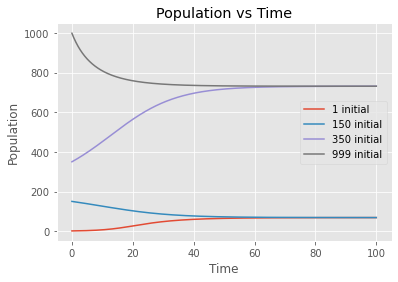

In [83]:
finalt, finals = dynamics_solve(popc, D = 1, s_0 = 1, t_0 = 0.0, h = 0.1, N = 1000, method = "RK4")
plt.plot(finalt, finals, label = "1 initial")

finalt, finals = dynamics_solve(popc, D = 1, s_0 = 150, t_0 = 0.0, h = 0.1, N = 1000, method = "RK4")
plt.plot(finalt, finals, label = "150 initial")

finalt, finals = dynamics_solve(popc, D = 1, s_0 = 350, t_0 = 0.0, h = 0.1, N = 1000, method = "RK4")
plt.plot(finalt, finals, label = "350 initial")

finalt, finals = dynamics_solve(popc, D = 1, s_0 = 999, t_0 = 0.0, h = 0.1, N = 1000, method = "RK4")
plt.plot(finalt, finals, label = "999 initial")

plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Population vs Time")


8) Fixed points are invariant and are values of a function that are mapped to themselves. AKA these points wont move if you start at them. So if you start at an initial population at any of the zeros the population wont grow or move at all. These fixed points are attractors, or sinks depending on how we want to look at them and are points the function tends to.

# D) Simulation and analysis of the two-body orbital dynamics problem

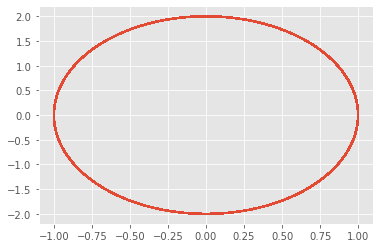

In [14]:
timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 365000, method = "SV")
plt.plot(momentumh,positionh)
# I mean I know momentum is supposed to be conserved but this is a long ways off
#I tried to at least simulate steps of one day and a period of 10k years

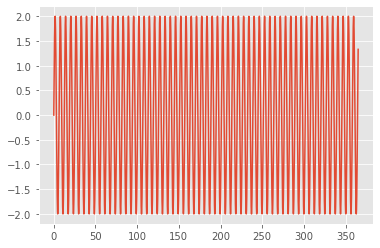

In [17]:
timeh, positionh, momentumh =  hamiltonian_solve(d_qH1, d_pH1, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 3650, method = "SV")
plt.plot(timeh, positionh)

#One "day" should be a complete rotation, I think for 10k cycles it would just be a solid block lol

Gutzwiller, Martin C. "Moon-Earth-Sun: The oldest three-body problem." Reviews of Modern Physics 70.2 (1998): 589.

source